In [1]:
import pickle

filename = 'cancermod.sav'
svm_model = pickle.load(open(filename, 'rb'))

from tensorflow import keras
cnn_model=keras.models.load_model("mymodimprove.h5")


In [6]:
#33
import cv2
impath="C:\\Users\\kavinraja\\Desktop\\bbb.jpeg"
src = cv2.imread(impath)

print( src.shape )
cv2.imshow("original Image" , src )


# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
cv2.imshow("GrayScale",grayScale)

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow("BlackHat",blackhat)

# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print( thresh2.shape )
cv2.imshow("Thresholded Mask",thresh2)

# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
cv2.imshow("InPaint",dst)
cv2.waitKey(0)

(224, 224, 3)
(224, 224)


-1

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from HsvDeger import karart
import csv
import glob


features=[0,0,0,0,0,0,0]
#path="C:\\Users\\kavinraja\\Documents\\projecct\\Untitled Folder\\train\\malignant\\1.jpg"

#path="C:\\Users\\kavinraja\\Desktop\\7.jpg"
#image_as = cv2.imread(path)
image_as=dst
img_clone = image_as.copy()
image = karart(image_as)
  
#---------------Lesion Segmentation  
lower = np.array([0, 100, 19], dtype = "uint8") 
upper = np.array([17, 200, 120], dtype = "uint8")
# Finding the colors within the specified limits and applying the mask
converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask  = cv2.inRange(converted, lower, upper)
    #--------Finding contours through the mask
contours, _ = cv2.findContours(mask , cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]
stencil = np.zeros(image.shape).astype(image.dtype)
cv2.fillPoly(stencil,  [cnt] , color=(255,255,255))
stencil = cv2.cvtColor(stencil, cv2.COLOR_BGR2GRAY)
    
put = cv2.bitwise_and(img_clone, img_clone, mask = stencil )
#--------Finding colour
img = put
height, width, _ = np.shape(img)
data = np.reshape(img, (height * width, 3))
data = np.float32(data)
number_clusters = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
_, _, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)
    
    

rgb_values = []  
for _, color in enumerate(centers):
    rgb = (int(color[2]), int(color[1]), int(color[0]))
    rgb_values.append(rgb)
for i in rgb_values:
    if(i[0]!=0 and i[1]!=0 and i[2]!=0):
        print("    dominant colour gbr:",i)
        features[2]=i[0]
        features[3]=i[1]
        features[4]=i[2]
    
    #radius
(x,y),radius = cv2.minEnclosingCircle(cnt)

print("    Radius:",radius)
center = (int(x),int(y))
radiu=int(radius)
sten2=stencil.copy()
sten2 = cv2.cvtColor(sten2, cv2.COLOR_GRAY2BGR)

cv2.circle(sten2,center,radiu,(0,255,0),2)
cv2.imshow("mask",sten2)

#pixels to mm has to bee converted
features[5] = 2*int(radius)
    
    #asymitrycity
       
width_cutoff = width // 2
def dice(pred, true, k = 255):
    intersection = np.sum(pred[true==k]) * 2.0
    print (intersection)
    dice = intersection / (np.sum(pred) + np.sum(true))
    print(dice)
    return dice
    
    
roi=stencil
radi2=int(radius)
try:
    roi1 = roi[:,:width_cutoff] #left half
    roi2 = roi[:, width_cutoff:] #right half
    
    roi2_mirror = cv2.flip(roi2, 1)
    cv2.imshow('right mirror', roi2_mirror)
    cv2.imshow('left mirror', roi1)     
    dice_score = dice(roi1, roi2_mirror) 
        
except IndexError:
    roi1 = roi[:, :(width_cutoff+1)] #left half
    roi2 = roi[:, (width_cutoff):] #right half
        
    roi2_mirror = cv2.flip(roi2, 1)
    cv2.imshow('right mirror', roi2_mirror)
               
    dice_score = dice(roi1, roi2_mirror)     
    print("roi1",roi1.shape)
    print("roi2",roi2.shape)

features[0]=round(dice_score,3)
print("Dice Similarity: ", dice_score)

    
    
    
    
print(features)
cv2.imshow('soutput',put)
cv2.imshow("images", image)
cv2.waitKey(0)

    dominant colour gbr: (129, 91, 72)
    Radius: 63.0994987487793
753270.0
0.5766152644934609
Dice Similarity:  0.5766152644934609
[0.577, 0, 129, 91, 72, 126, 0]


-1

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predictionn(path,loaded):
    a=image.load_img(path,target_size=(224,224,3))
    print("\n\n")
    a=image.img_to_array(a)
    plt.imshow(a/255)
    img = np.array(a) / 255.0
    i=np.expand_dims(img,axis=0)
    p=loaded.predict(i)
    ref={  
    "1":"akiec",
    "2":"bcc",
    "3":"bkl",   
    "4":"df",
    "5":"mel",
    "6":"nv",
    "7":"vasc",
    }
    pred=np.argmax(p)    
    m=0
    s=['akiec','bcc','bkl','df','mel','nv','vasc']
    for i in p:
        for j in i:
            print(s[m],end="   :  ")
            print(j)
            m=m+1
    print(f"\n{s[pred]}")

C:\Users\kavinraja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[1]
the leison is a cancerous image



akiec   :  0.014161683
bcc   :  0.028520556
bkl   :  0.26297238
df   :  0.002580178
mel   :  0.10123369
nv   :  0.5885401
vasc   :  0.0019915008

nv


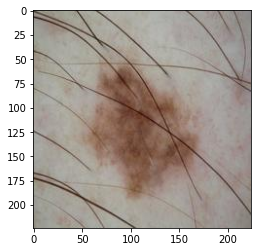

In [9]:

prediction = svm_model.predict([[features[0],features[1],features[2],features[3],features[4],features[5]]])
print(prediction)
if(prediction==1):
    print("the leison is a cancerous image")
    predictionn(impath,cnn_model)

else:
    print("the leison NOT A cancerous image")
